In [1]:
"""
Created on July 2024
@author: Théotime de la Selle
"""

import os, sys, time, random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import nltk as nl
from nltk.tokenize import word_tokenize,wordpunct_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from scipy.signal import correlate

import cltk
from cltk import NLP

/usr/local/lib/python3.10/dist-packages/torch/cuda/__init__.py:654: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
"""
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('punkt')
"""

"\nnltk.download('omw-1.4')\nnltk.download('wordnet')\nnltk.download('stopwords')\nnltk.download('words')\nnltk.download('punkt')\n"

# Load and verify data

In [3]:
# charger et formater les données
Mark = pd.read_csv("data/Mark.txt",delimiter='\t', skiprows=(0),dtype=str,header=1)
Matt = pd.read_csv("data/Matt.txt",delimiter='\t', skiprows=(0),dtype=str,header=1)
Luke = pd.read_csv("data/Luke.txt",delimiter='\t', skiprows=(0),dtype=str,header=1)
John = pd.read_csv("data/John.txt",delimiter='\t', skiprows=(0),dtype=str,header=1)
# words = data[2]
display(Mark.sample(5))
display(Mark.shape)
display(Matt.sample(5))
display(Matt.shape)
display(Luke.sample(5))
display(Luke.shape)
display(John.sample(5))
display(John.shape)

,Verses,Text
259,Mark 7:12,⸀οὐκέτι ἀφίετε αὐτὸν οὐδὲν ποιῆσαι τῷ ⸀πατρὶ ἢ...
133,Mark 4:26,Καὶ ἔλεγεν· Οὕτως ἐστὶν ἡ βασιλεία τοῦ θεοῦ ⸀ὡ...
599,Mark 14:65,καὶ ἤρξαντό τινες ἐμπτύειν αὐτῷ καὶ περικαλύπτ...
460,Mark 12:7,ἐκεῖνοι δὲ οἱ γεωργοὶ ⸂πρὸς ἑαυτοὺς εἶπαν⸃ ὅτι...
585,Mark 14:51,Καὶ ⸂νεανίσκος τις⸃ ⸀συνηκολούθει αὐτῷ περιβεβ...


(673, 2)

,Verses,Text
458,Matt 14:6,⸂γενεσίοις δὲ γενομένοις⸃ τοῦ Ἡρῴδου ὠρχήσατο ...
699,Matt 21:20,καὶ ἰδόντες οἱ μαθηταὶ ἐθαύμασαν λέγοντες· Πῶς...
830,Matt 24:21,ἔσται γὰρ τότε θλῖψις μεγάλη οἵα οὐ γέγονεν ἀπ...
927,Matt 26:21,καὶ ἐσθιόντων αὐτῶν εἶπεν· Ἀμὴν λέγω ὑμῖν ὅτι ...
722,Matt 21:43,διὰ τοῦτο λέγω ὑμῖν ὅτι ἀρθήσεται ἀφʼ ὑμῶν ἡ β...


(1068, 2)

,Verses,Text
1103,Luke 24:8,"καὶ ἐμνήσθησαν τῶν ῥημάτων αὐτοῦ,"
969,Luke 21:38,καὶ πᾶς ὁ λαὸς ὤρθριζεν πρὸς αὐτὸν ἐν τῷ ἱερῷ ...
197,Luke 4:28,καὶ ἐπλήσθησαν πάντες θυμοῦ ἐν τῇ συναγωγῇ ἀκο...
242,Luke 5:29,Καὶ ἐποίησεν δοχὴν μεγάλην Λευὶς αὐτῷ ἐν τῇ οἰ...
920,Luke 20:36,"⸀οὐδὲ γὰρ ἀποθανεῖν ἔτι δύνανται, ἰσάγγελοι γά..."


(1149, 2)

,Verses,Text
113,John 4:2,καίτοιγε Ἰησοῦς αὐτὸς οὐκ ἐβάπτιζεν ἀλλʼ οἱ μα...
124,John 4:13,ἀπεκρίθη Ἰησοῦς καὶ εἶπεν αὐτῇ· Πᾶς ὁ πίνων ἐκ...
871,John 21:19,τοῦτο δὲ εἶπεν σημαίνων ποίῳ θανάτῳ δοξάσει τὸ...
334,John 7:52,ἀπεκρίθησαν καὶ εἶπαν αὐτῷ· Μὴ καὶ σὺ ἐκ τῆς Γ...
444,John 10:9,ἐγώ εἰμι ἡ θύρα· διʼ ἐμοῦ ἐάν τις εἰσέλθῃ σωθή...


(878, 2)

# Data standardization

In [17]:
# Remove critical apparatus symbols
crit_symbols_list = ['⸀', '⸂','⸃','⟧','⟦'] # list of symbols
Mark.Text = Mark.Text.replace(crit_symbols_list,'',regex=True)
Matt.Text = Matt.Text.replace(crit_symbols_list,'',regex=True)
Luke.Text = Luke.Text.replace(crit_symbols_list,'',regex=True)
John.Text = John.Text.replace(crit_symbols_list,'',regex=True)

# Lower case
Mark.Text = Mark.Text.str.lower()
Matt.Text = Matt.Text.str.lower()
Luke.Text = Luke.Text.str.lower()
John.Text = John.Text.str.lower()

# Control
Mark.Text.sample(10)

133    καὶ ἔλεγεν· οὕτως ἐστὶν ἡ βασιλεία τοῦ θεοῦ ὡς...
317    καὶ προσκαλεσάμενος τὸν ὄχλον σὺν τοῖς μαθηταῖ...
641    δραμὼν δέ τις καὶ γεμίσας σπόγγον ὄξους περιθε...
177    καὶ εὐθὺς ἐξηράνθη ἡ πηγὴ τοῦ αἵματος αὐτῆς, κ...
657    καὶ εἰσελθοῦσαι εἰς τὸ μνημεῖον εἶδον νεανίσκο...
125    καὶ ἄλλοι εἰσὶν οἱ εἰς τὰς ἀκάνθας σπειρόμενοι...
193    καὶ γενομένου σαββάτου ἤρξατο διδάσκειν ἐν τῇ ...
438    καὶ ἐδίδασκεν καὶ ἔλεγεν αὐτοῖς· οὐ γέγραπται ...
237    καὶ ἀποταξάμενος αὐτοῖς ἀπῆλθεν εἰς τὸ ὄρος πρ...
465    καὶ ἐζήτουν αὐτὸν κρατῆσαι, καὶ ἐφοβήθησαν τὸν...
Name: Text, dtype: object

# Cltk text processing test

In [18]:
cltk_nlp_grc = NLP(language="grc")

‎𐤀 CLTK version '1.3.0'. When using the CLTK in research, please cite: https://aclanthology.org/2021.acl-demo.3/

Pipeline for language 'Ancient Greek' (ISO: 'grc'): `GreekNormalizeProcess`, `GreekSpacyProcess`, `GreekEmbeddingsProcess`, `StopsProcess`.

⸖ ``GreekSpacyProcess`` using OdyCy model by Center for Humanities Computing Aarhus from https://huggingface.co/chcaa . Please cite: https://aclanthology.org/2023.latechclfl-1.14
⸖ ``LatinEmbeddingsProcess`` using word2vec model by University of Oslo from http://vectors.nlpl.eu/ . Please cite: https://aclanthology.org/W17-0237/

⸎ To suppress these messages, instantiate ``NLP()`` with ``suppress_banner=True``.


In [21]:
%time cltk_doc_grc = cltk_nlp_grc.analyze(text=Mark.Text[1])

CPU times: user 11.2 ms, sys: 0 ns, total: 11.2 ms
Wall time: 10.8 ms


In [24]:
# Inspection of doc 
print(f"\nFull sentence :",cltk_doc_grc.sentences_strings)
print(f"Tokens :",cltk_doc_grc.tokens)
print(f"\nFirst word :",cltk_doc_grc.words[2])
print(f"\nLemmatas :",cltk_doc_grc.lemmata)


Full sentence : ['καθὼς γέγραπται ἐν τῷ ἠσαΐᾳ τῷ προφήτῃ ·', 'ἰδοὺ ἀποστέλλω τὸν ἄγγελόν μου πρὸ προσώπου σου , ὃς κατασκευάσει τὴν ὁδόν σου ·']
Tokens : ['καθὼς', 'γέγραπται', 'ἐν', 'τῷ', 'ἠσαΐᾳ', 'τῷ', 'προφήτῃ', '·', 'ἰδοὺ', 'ἀποστέλλω', 'τὸν', 'ἄγγελόν', 'μου', 'πρὸ', 'προσώπου', 'σου', ',', 'ὃς', 'κατασκευάσει', 'τὴν', 'ὁδόν', 'σου', '·']

First word : Word(index_char_start=16, index_char_stop=18, index_token=3, index_sentence=0, string='ἐν', pos=adposition, lemma='ἐν', stem=None, scansion=None, xpos='R-', upos='ADP', dependency_relation='case', governor=5, features={}, category={F: [pos], N: [neg], V: [neg]}, stop=True, named_entity=None, syllables=None, phonetic_transcription=None, definition=None)

Lemmatas : ['καθώς', 'γράφω', 'ἐν', 'ὁ', 'ἠσαΐᾳ', 'ὁ', 'προφήτης', '·', 'ἰδοὺ', 'ἀποστέλλω', 'ὁ', 'ἄγγελος', 'ἐγώ', 'πρό', 'πρόσωπον', 'σύ', ',', 'ὅς', 'κατασκευάζω', 'ὁ', 'ὁδός', 'σύ', '·']


In [ ]:
# Remove stop words (example)
from cltk.stops.words import Stops
from cltk.languages.example_texts import get_example_text
from boltons.strutils import split_punct_ws
stops_obj = Stops(iso_code="lat")
tokens = split_punct_ws(get_example_text("lat"))
print(len(tokens))
print(tokens[25:30])
tokens_filtered = stops_obj.remove_stopwords(tokens=tokens)
print(len(tokens_filtered))
print(tokens_filtered[22:26])

In [26]:
# Build dependency tree
from cltk.dependency.tree import DependencyTree
a_tree_grc = DependencyTree.to_tree(cltk_doc_grc.sentences[0])  #81
print(f"Denpencies in sentence :",a_tree_grc.get_dependencies())
print('-------------------')
a_tree_grc.print_tree()

Denpencies in sentence : [advmod(γέγραπται_2/verb, καθὼς_1/adverb), case(ἠσαΐᾳ_5/adjective, ἐν_3/adposition), det(ἠσαΐᾳ_5/adjective, τῷ_4/determiner), det(προφήτῃ_7/noun, τῷ_6/determiner), nmod(ἠσαΐᾳ_5/adjective, προφήτῃ_7/noun), obl(γέγραπται_2/verb, ἠσαΐᾳ_5/adjective), punct(γέγραπται_2/verb, ·_8/punctuation), root(None, γέγραπται_2/verb)]
-------------------
root | γέγραπται_2/verb
    └─ advmod | καθὼς_1/adverb
    └─ obl | ἠσαΐᾳ_5/adjective
        └─ case | ἐν_3/adposition
        └─ det | τῷ_4/determiner
        └─ nmod | προφήτῃ_7/noun
            └─ det | τῷ_6/determiner
    └─ punct | ·_8/punctuation


In [27]:
# Extract features automatically
from cltk.utils.feature_extraction import cltk_doc_to_features_table
feature_names_grc, list_of_list_features_grc = cltk_doc_to_features_table(cltk_doc=cltk_doc_grc)
print(feature_names_grc)

['string', 'lemma', 'embedding', 'is_stop', 'lemma', 'pos', 'case', 'gender', 'animacy', 'number', 'definiteness', 'degree', 'strength', 'verbform', 'tense', 'mood', 'aspect', 'voice', 'person', 'polarity', 'politeness', 'clusivity', 'evidentiality', 'strength', 'governing_word', 'governor_case', 'governor_gender', 'governor_animacy', 'governor_number', 'governor_definiteness', 'governor_degree', 'governor_strength', 'governor_verbform', 'governor_tense', 'governor_mood', 'governor_aspect', 'governor_voice', 'governor_person', 'governor_polarity', 'governor_politeness', 'governor_clusivity', 'governor_evidentiality', 'governor_strength', 'governing_relationship']


In [28]:
print("len() of feature instances (one for each token):", len(list_of_list_features_grc))
print("\nExample of one instance row:", list_of_list_features_grc[4])

# Putting these together for easier reading
print('-----------------------------------------------------------')
print(list(zip(feature_names_grc, list_of_list_features_grc[4])))

len() of feature instances (one for each token): 23

Example of one instance row: ['ἠσαΐᾳ', 'ἠσαΐᾳ', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), False, None, 'adjective', 'dative', 'masculine', None, 'singular', None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'adjective', 'dative', 'masculine', None, 'singular', None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'obl']
-----------------------------------------------------------
[('string', 'ἠσαΐᾳ'), ('lemma', 'ἠσαΐᾳ'), ('embedding', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 

# Nltk text preprocessing

In [6]:
# test tokenization
nltk.download('punkt')
tokens = word_tokenize(Mark.Text[0])
print(Mark.Text[0])
print(tokens)

# display(Mark.sample(5))
# display(Matt.sample(5))
# display(Luke.sample(5))
# display(John.sample(5))

[nltk_data] Error loading punkt: <urlopen error [Errno 13] Permission
[nltk_data]     denied>


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/home/delaselt/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


# Edit distance test on 2 verses

In [126]:
# Edit distance test on verses
id_verse_1 = "Mark 1:2"
id_verse_2 = "Mark 1:4"

# Find the verses in dataframes
v_1 = Mark[Mark.Verses == id_verse_1]
display(v_1)
v_2 = Mark[Mark.Verses == id_verse_2]
display(v_2)

# Reset indexes for following commandds 
v_1.reset_index(drop=True,inplace=True)
v_2.reset_index(drop=True,inplace=True)

# Extract texts (str format)
str_v1 = v_1.Text[0]
print(f"Length of verse 1 :",len(str_v1))
str_v2 = v_2.Text[0]
print(f"Length of verse 2 :",len(str_v2))
lengths_diff = int(len(str_v1)-len(str_v2))

# Tokenize text
tokens_v1 = wordpunct_tokenize(str_v1)
tokens_v2 = wordpunct_tokenize(str_v2)
tokens_diff = int(len(tokens_v1)-len(tokens_v2))



# Compute edit distance (characters)
edit_dist = nl.edit_distance(tokens_v2, tokens_v1)-tokens_diff  # Distance brute (unité : mots/caractères d'écart)
print(f"Edit distance between 2 verses :",edit_dist)

,Verses,Text
1,Mark 1:2,⸀καθὼς γέγραπται ἐν ⸂τῷ ἠσαΐᾳ τῷ προφήτῃ⸃· ⸀ἰδ...


,Verses,Text
3,Mark 1:4,ἐγένετο ἰωάννης ⸀ὁ βαπτίζων ἐν τῇ ⸀ἐρήμῳ κηρύσ...


Length of verse 1 : 124
Length of verse 2 : 90
Edit distance between 2 verses : 15


In [30]:
# Selection chaine de mots et assemblage
wordsSeriesCitation = words[0:22]
target = []
for c in wordsSeriesCitation:
        target.append(c+" ")  
targetLength = len(target)
print(f"Texte cible :",target)

Texte cible : ['ἐν ', 'ἀρχῇ ', 'ἐποίησεν ', 'ὁ ', 'θεὸς ', 'τὸν ', 'οὐρανὸν ', 'καὶ ', 'τὴν ', 'γῆν ', 'ἡ ', 'δὲ ', 'γῆ ', 'ἦν ', 'ἀόρατος ', 'καὶ ', 'ἀκατασκεύαστος ', 'καὶ ', 'σκότος ', 'ἐπάνω ', 'τῆς ', 'ἀβύσσου ']


In [34]:
# Définition aire de recherche et assemblage
wordsSeriesTest = words[:]
textToMine = []
for c in wordsSeriesTest:
        # print(c)
        textToMine.append(c+" ")
# print(f"Nombre de mots dans texte à fouiller :",len(textToMine))
print(textToMine[0:20])

['ἐν ', 'ἀρχῇ ', 'ἐποίησεν ', 'ὁ ', 'θεὸς ', 'τὸν ', 'οὐρανὸν ', 'καὶ ', 'τὴν ', 'γῆν ', 'ἡ ', 'δὲ ', 'γῆ ', 'ἦν ', 'ἀόρατος ', 'καὶ ', 'ἀκατασκεύαστος ', 'καὶ ', 'σκότος ', 'ἐπάνω ']


In [35]:
# Choix fenetre de recherche
# window = 20
window = len(target)+1
lengths_diff = window-targetLength
display(lengths_diff)

1

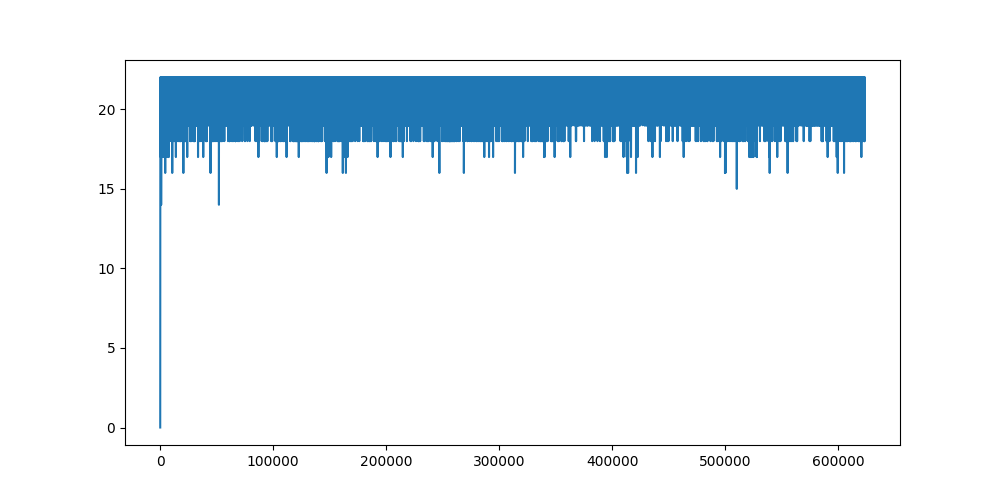

In [36]:
# Calcul distances de Levensthein sur fenetre glissante
dist = np.zeros(int(len(textToMine)/lengths_diff))
for t in range(0,len(dist)):
    # dist[t] = ((nl.edit_distance(target, textToMine[t*lengths_diff:(t*lengths_diff+window)])-lengths_diff)/targetLength)   # Distance normalisée
    dist[t] = nl.edit_distance(target, textToMine[t*lengths_diff:(t*lengths_diff+window)])-lengths_diff  # Distance brute (unité : mots/caractères d'écart)

%matplotlib widget
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,len(dist),1),dist)
plt.show()

# plt.figure(figsize=(10,5))
# plt.hist(dist,bins=15)
# plt.show()

In [42]:
# filter dist to find citation occurences
index_mined = np.nonzero(dist<16)

# split string in individual characters
charactersToMine = [*textToMine]

fulltext = np.array(charactersToMine)
citations_dist = []
citations_char = []
s = ""
for i in index_mined[0]:
    citations_dist.append(dist[i])
    citations_char.append(s.join(fulltext[i*lengths_diff:(i*lengths_diff+window)]))

In [43]:
# Build dataframe with citations corresponding distances 
citations = pd.DataFrame({'Id':index_mined[0],'Distance':citations_dist,'Citations':citations_char})

def filter(data):
    length = data['Group'].size
    for i in range(length-2):
        if (data['Group'][i] == data['Group'][i+1]):
            data = data.drop(i+1).reset_index(drop=True)
            # data.index[(i+1):] = data.index[(i+1):]-1
            # display(data)
            return filter(data)
    data = data.drop(['index','Group'],axis=1)
    return data

def consecutive(data):
    ide = 0
    index =  []
    for i in range(len(data)-1):
        if (data[i+1]-data[i]) == 1:
            index.append(ide)
        else: 
            index.append(ide)
            ide += 1
    index.append(ide)
    return index

consecutive_citations = consecutive(np.array(citations['Id']))
citations['Group'] = consecutive_citations
citations = citations.sort_values(by=['Group','Distance'])
# display(citations.drop([0]).reset_index(drop=True))
citations = filter(citations.reset_index())
display(citations)
# consecutive_citations.index(1)
# np.where(consecutive_citations == 0)

,Id,Distance,Citations
0,0,0.0,ἐν ἀρχῇ ἐποίησεν ὁ θεὸς τὸν οὐρανὸν καὶ τὴν γῆ...
1,813,14.0,ἐγένετο ᾗ ἡμέρᾳ ἐποίησεν ὁ θεὸς τὸν οὐρανὸν κα...
2,51968,14.0,ἐν ἓξ ἡμέραις ἐποίησεν κύριος τὸν οὐρανὸν καὶ ...
3,510391,15.0,τὰ παταχρα καὶ ἀναβλέψονται εἰς τὸν οὐρανὸν ἄν...
4,510392,15.0,παταχρα καὶ ἀναβλέψονται εἰς τὸν οὐρανὸν ἄνω κ...


In [45]:
# Afficher une portion de texte citant la cible
Id_txt = 4
print(citations.Citations[Id_txt])

παταχρα καὶ ἀναβλέψονται εἰς τὸν οὐρανὸν ἄνω καὶ εἰς τὴν γῆν κάτω ἐμβλέψονται καὶ ἰδοὺ θλῖψις καὶ στενοχωρία καὶ σκότος ἀπορία στενὴ καὶ 


In [43]:
# group consecutive X
g = citations['Id'].diff().gt(1).cumsum() # no need to group here, we'll group later
display(g)
# filter groups
out = citations.groupby(['Id', g]).filter(lambda g: len(g)>=0)#.reset_index(drop=True)
display(out)

0    0
1    1
Name: Id, dtype: int64

,Id,Distance,Citations,Group
0,0,0.0,ἐν ἀρχῇ ἐποίησεν ὁ θεὸς τὸν οὐρανὸν καὶ τὴν γῆ...,0
1,55,0.0,ἦν ἀόρατος καὶ ἀκατασκεύαστος καὶ σκότος ἐπάν...,1
